# Section 6

In [32]:
import Pkg;
Pkg.add("FastGaussQuadrature")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [33]:
using PyPlot

rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")

rcParams["text.usetex"] = true
rcParams["font.family"] = "serif"
rcParams["font.size"] = 16
rcParams["text.latex.preamble"] = raw"\usepackage{amsmath}"

"\\usepackage{amsmath}"

In [34]:
import PyCall: pyimport
irbasis3 = pyimport("irbasis3")

PyObject <module 'irbasis3' from '/usr/local/lib/python3.9/site-packages/irbasis3/__init__.py'>

## Generate IR basis by singular value expansion

In [35]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100
beta = 10
wmax = lambda_/beta
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(
    K, statistics="F", beta=beta, eps=1e-10)

PyObject <irbasis3.basis.FiniteTempBasis object at 0x19b340be0>

## Singular values

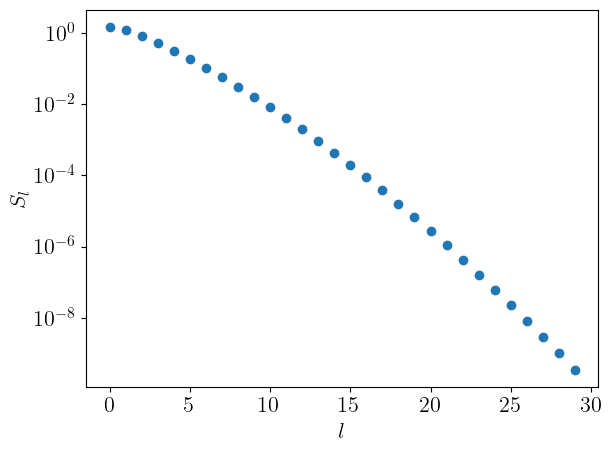

In [36]:
plt.semilogy(basis.s, marker="o", ls="")
plt.xlabel(L"$l$")
plt.ylabel(L"$S_l$")
plt.tight_layout()
plt.savefig("ir_basis_svals_julia.pdf", transparent=true)

## $U_l(\tau)$ and $V_l(\omega)$

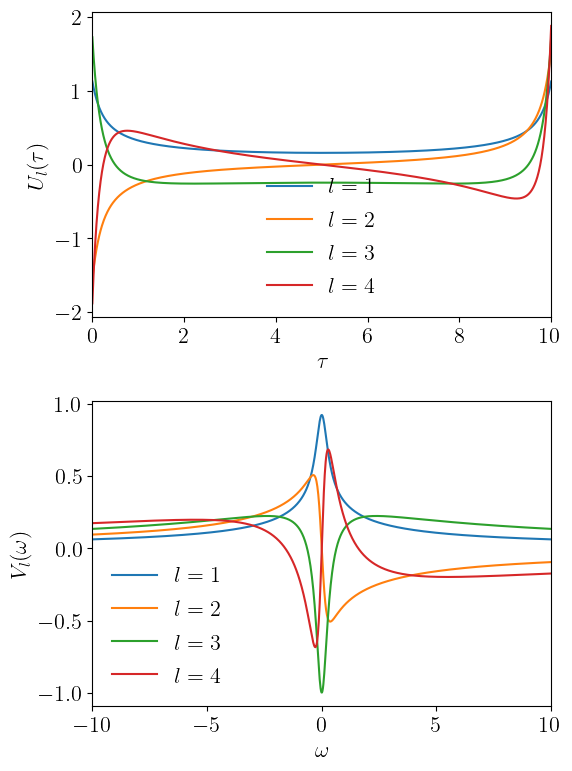

In [37]:
fig = plt.figure(figsize=(6,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
axes = [ax1, ax2]

taus = collect(range(0, beta, length=1000))
omegas = collect(range(-wmax, wmax, length=1000))

for l in 1:4
    label = L"$l=" * string(l) * L"$"
    ax1.plot(taus, basis.u[l](taus), label=label)
    ax2.plot(omegas, basis.v[l](omegas), label=label)
end
ax1.set_xlabel(L"$\tau$")
ax2.set_xlabel(L"$\omega$")
ax1.set_ylabel(L"$U_l(\tau)$")
ax2.set_ylabel(L"$V_l(\omega)$")
ax1.set_xlim([0, beta])
ax2.set_xlim([-wmax, wmax])

ax1.legend(loc="best", frameon=false)
ax2.legend(loc="best", frameon=false)
plt.tight_layout()
plt.savefig("ir_basis_functions_julia.pdf", transparent=true)

In [38]:
# Set up Composite Gauss-Legendre quadrature
# Let -wmax = w_1 < w_2 < ... < w_{N-1} < w_N = wmax be a partition of [-wmax, wmax],
# where w_2, ..., w_{N-1} are the roots of the highest basis function in omega.
# We apply Gauss-Legendre quadrature to each integral. 
using FastGaussQuadrature

"""
Scale weights and notes of quadrature to the interval [xmin, xmax]
"""
function scale_quad(x, w, xmax, xmin)
    @assert xmin < xmax
    dx = xmax - xmin
    w_ = 0.5 * dx * w
    x_ = (0.5 * dx) .* (x .+ 1) .+ xmin
    return x_, w_
end

# Roots of highest V_l
roots = basis.v[-1].roots()
bins = vcat([-wmax], roots, [wmax])

x, w = gausslegendre(20)
omegas_quad = []
weights_quad = []
for i in 1:(length(bins)-1)
    x_, w_ = scale_quad(x, w, bins[i+1], bins[i])
    push!(omegas_quad, x_)
    push!(weights_quad, w_)
end
omegas_quad = reduce(vcat, omegas_quad)
weights_quad = reduce(vcat, weights_quad)
;

In [39]:
# Check orthogonality condition
for i in 1:basis.size, j in i:basis.size
    println(i, " ", j, " ",
       sum(weights_quad .* (basis.v[j](omegas_quad) .* basis.v[i](omegas_quad)))
    )
end

1 1 0.9999999999999994
1 2 1.1565387861810217e-17
1 3 3.2897065605462517e-17
1 4 -2.1570541034778012e-17
1 5 7.182839392716467e-18
1 6 -1.9071793840377826e-17
1 7 -3.733382418318054e-17
1 8 -1.8228149024912543e-18
1 9 3.226179089502179e-17
1 10 1.2983321015513916e-17
1 11 -3.5575383784680614e-18
1 12 -8.693946170618139e-18
1 13 -3.808937757213138e-17
1 14 1.3891340334970526e-18
1 15 -6.009868167358712e-17
1 16 -7.074419175467916e-18
1 17 -3.0052728968582576e-17
1 18 3.6097156080189263e-17
1 19 -1.2227090000205276e-16
1 20 -1.950208657758301e-17
1 21 -6.036295595313046e-17
1 22 1.6249480060126498e-17
1 23 -1.4915911387969327e-16
1 24 -7.548757625930325e-18
1 25 -1.0836600713992617e-16
1 26 1.0625181290357943e-17
1 27 -7.527073582480615e-17
1 28 -1.6750923564901044e-17
1 29 -1.3187964175570555e-16
1 30 1.395910297075087e-18
2 2 0.9999999999999994
2 3 -1.2356516634545733e-17
2 4 -1.3247595295057257e-18
2 5 1.0570971181733668e-18
2 6 2.4875663594964292e-17
2 7 -2.927345865710862e-18
2 8 3.